When to Use ARIMA?
📌 When data shows trends but no strong seasonality.
📌 When you need interpretable forecasts.
📌 When past observations influence future values.

If seasonality exists, you should use SARIMA (Seasonal ARIMA).

Dataset used is air passenger data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
file_path = "AirPassengers.csv"  # Update this if needed
df = pd.read_csv(file_path)

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [ ]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)

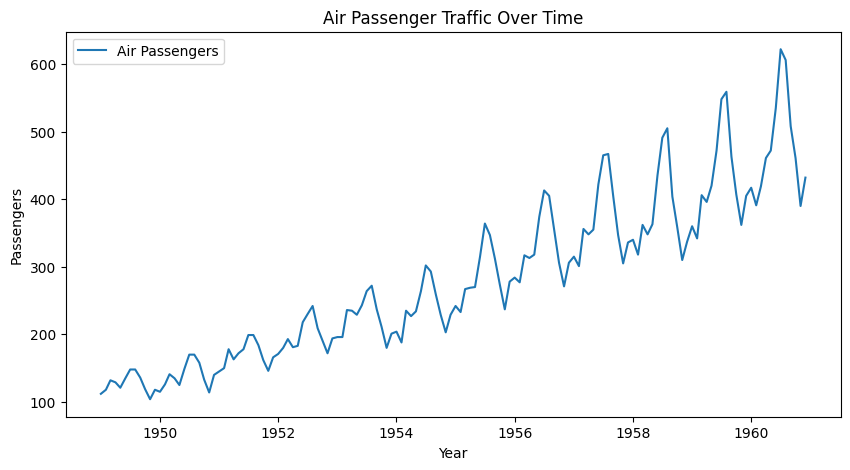

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df, label="Air Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("Air Passenger Traffic Over Time")
plt.legend()
plt.show()

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")

adf_test(df["Passengers"])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Non-stationary


In [ ]:
df["Passengers_Diff"] = df["Passengers"].diff().dropna()

<Figure size 1200x500 with 0 Axes>

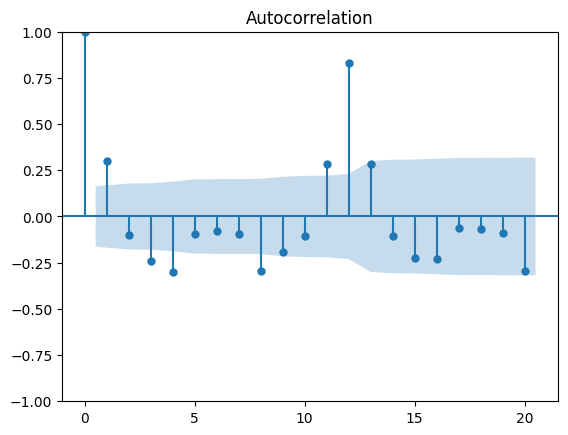

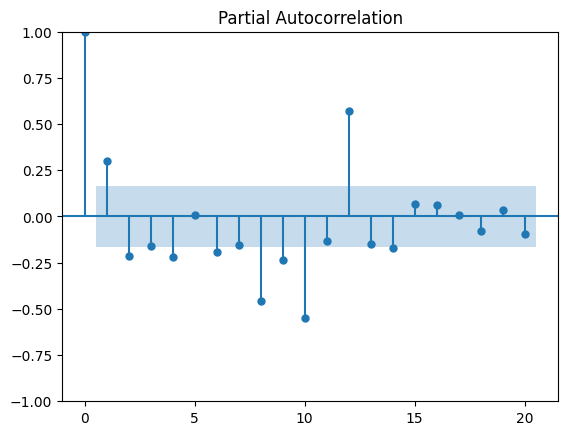

In [ ]:
plt.figure(figsize=(12, 5))
plot_acf(df["Passengers_Diff"].dropna(), lags=20)
plot_pacf(df["Passengers_Diff"].dropna(), lags=20)
plt.show()

In [ ]:
p, d, q = 2, 1, 2

In [ ]:
model = sm.tsa.ARIMA(df["Passengers"], order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model = ARIMA(df['Passengers'], order=(2, 1, 2)) # Assuming df is your DataFrame
model_fit = model.fit()
print(model_fit.summary())



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 01 Apr 2025   AIC                           1353.347
Time:                        04:07:20   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import warnings # import the warnings module


size = int(len(df) - 30) # Replacing 'data' with 'df', which holds the AirPassengers data
train, test = df['Passengers'][0:size], df['Passengers'][size:len(df)] # Replacing 'data' with 'df' here as well

print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = ARIMA(history, order=(2,1,2))
    # Instead of 'disp' argument, use 'suppress_warnings=True' for newer versions, or capture warnings.
    # For older versions of statsmodels, you can set 'method="css-mle"' for conditional sum of squares.
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")  # Suppress warnings
        model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 

predicted = 435.368729, expected = 491.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]
<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 487.825559, expected = 505.000000
predicted = 484.761914, expected = 404.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]
<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 359.074739, expected = 359.000000
predicted = 380.902398, expected = 310.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]
<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 291.230227, expected = 337.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 336.937875, expected = 360.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 367.624722, expected = 342.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]
<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 360.295134, expected = 406.000000
predicted = 414.083702, expected = 396.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 378.520878, expected = 420.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]
<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 424.474755, expected = 472.000000
predicted = 459.477027, expected = 548.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 534.244080, expected = 559.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 523.516869, expected = 463.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 417.605516, expected = 407.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 366.683909, expected = 362.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 339.217575, expected = 405.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 411.312454, expected = 417.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 435.937844, expected = 391.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 418.796173, expected = 419.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 451.314963, expected = 461.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 488.383979, expected = 472.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 488.569136, expected = 535.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 532.219019, expected = 622.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 601.265999, expected = 606.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 563.028797, expected = 508.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 452.854957, expected = 461.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 415.004912, expected = 390.000000
predicted = 367.692302, expected = 432.000000


<ipython-input-59-93f1c71a973e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


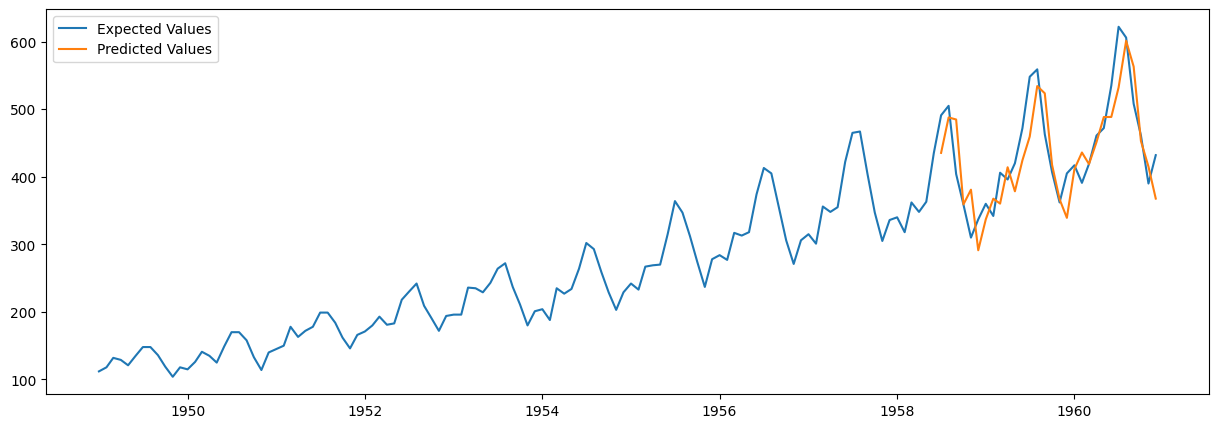

In [ ]:
predictions_series = pd.Series(predictions, index=test.index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

plt.subplot(1, 1, 1)
# Replace 'data' with 'df' to refer to the AirPassengers DataFrame
plt.plot(df['Passengers'], label='Expected Values')
plt.plot(predictions_series, label='Predicted Values')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Test RMSE: 45.350
Mean Absolute Percentage Error (MAPE): 8.36%
